<a id="section_toc"></a> 
## Tabla de Contenidos

 
* Data cleaning

[price variables](#price)

[missing](#missing)

[price_usd_per_m2](#section_price_1000)

[surface_covered_in_m2](#section_surface)

[room](#section_room)

[expenses](#section_exp2)

[floor](#section_floor)

* Relaciones entre variables

[descriptivas](#section_des)

[correlacion](#section_corr)

[lat_lon](#section_latlon)

* Nuevas columnas/variables creadas:

sobre el data original:

[sup_uncovered](#section_uncovered)

[barrios group](#section_barrios)

[property_type y barrios](#section_property)

[pileta y cochera](#section_pileta)

sobre data externa: 

[subte](#section_externa)

[colectivo/bus](#section_bus)

[ferrocarril/train](#section_train)

* Final data

[final_data](#section_final)

* Regresiones lineales

[regresiones](#section_regres)


In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import requests
sns.set() #par que es?
import missingno as msno

In [2]:
df = pd.read_csv("../data/properati.csv", index_col=0)
df.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [3]:
caba = df.loc[df.state_name == 'Capital Federal', :]
caba.shape

(32316, 25)

In [4]:
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32316 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   32316 non-null  object 
 1   property_type               32316 non-null  object 
 2   place_name                  32316 non-null  object 
 3   place_with_parent_names     32316 non-null  object 
 4   country_name                32316 non-null  object 
 5   state_name                  32316 non-null  object 
 6   geonames_id                 31030 non-null  float64
 7   lat-lon                     23770 non-null  object 
 8   lat                         23770 non-null  float64
 9   lon                         23770 non-null  float64
 10  price                       29018 non-null  float64
 11  currency                    29018 non-null  object 
 12  price_aprox_local_currency  29018 non-null  float64
 13  price_aprox_usd             29

<a id="price"></a> 
## price variables

[volver a TOC](#section_toc)

price_aprox_usd (29018 non-null) tiene menos missings que price_usd_per_m2 (23434 non-null), e igual a  price (29018 non-null).

In [5]:
caba['xr'] = caba['price_aprox_local_currency'] / caba['price_aprox_usd']
caba['xr']

/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0         17.6445
2         17.6445
3         17.6445
7         17.6445
8         17.6445
           ...   
121160    17.6445
121209    17.6445
121215    17.6445
121217    17.6445
121219    17.6445
Name: xr, Length: 32316, dtype: float64

El tipo de cambio fue 17.64

In [6]:
caba['currency'].value_counts()

USD    27826
ARS     1190
PEN        2
Name: currency, dtype: int64

In [7]:
dif = caba['price'] - caba['price_aprox_usd']
dif

0         0.0
2         0.0
3         0.0
7         0.0
8         0.0
         ... 
121160    0.0
121209    0.0
121215    0.0
121217    0.0
121219    0.0
Length: 32316, dtype: float64

La diferencia entre price y price_aprox_usd, son los 1190 que estan en currency pesos.

In [8]:
dif.value_counts()

0.00           27826
47083357.64        6
1812319.35         5
1973448.69         4
1660443.21         4
               ...  
1051428.40         1
1982224.28         1
1624118.48         1
2129835.81         1
2274601.42         1
Length: 978, dtype: int64

In [9]:
sup = caba['surface_total_in_m2'] - caba['surface_covered_in_m2']

In [10]:
sup.value_counts() #varias coincidencias entre covered y total

0.0       6569
4.0       1947
5.0       1910
3.0       1856
6.0       1270
          ... 
146.0        1
154.0        1
431.0        1
161.0        1
1031.0       1
Length: 488, dtype: int64

In [11]:
caba.surface_total_in_m2.isnull().sum()

5879

In [12]:
# #Reemplazamos los missing de sup total con covered.
# caba['surface_total_in_m2'] = caba.surface_total_in_m2.fillna(caba['surface_covered_in_m2'])
# #Try using .loc[row_indexer,col_indexer] = value instead
# caba.surface_total_in_m2.isnull().sum() 

Calculo de variable dependiente alternativa

In [13]:
caba['p_usd_m2'] = round(caba['price_aprox_usd']/caba['surface_total_in_m2'],0)


/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32316 entries, 0 to 121219
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   32316 non-null  object 
 1   property_type               32316 non-null  object 
 2   place_name                  32316 non-null  object 
 3   place_with_parent_names     32316 non-null  object 
 4   country_name                32316 non-null  object 
 5   state_name                  32316 non-null  object 
 6   geonames_id                 31030 non-null  float64
 7   lat-lon                     23770 non-null  object 
 8   lat                         23770 non-null  float64
 9   lon                         23770 non-null  float64
 10  price                       29018 non-null  float64
 11  currency                    29018 non-null  object 
 12  price_aprox_local_currency  29018 non-null  float64
 13  price_aprox_usd             29

In [15]:
d = caba['p_usd_m2'] - caba['price_usd_per_m2']
d.value_counts() 
#son casi iguales solo que price_usd_per_m2 tiene 23434 non-null, y p_usd_m2 28454 non-null

 0.000000    3237
-0.333333     579
 0.333333     239
-0.500000     225
 0.285714     199
             ... 
-0.467468       1
 0.342466       1
-0.339806       1
 0.029412       1
 0.070175       1
Length: 5435, dtype: int64

In [16]:
caba.drop(caba.columns[[0, 3, 4, 5, 6, 7, 10, 11, 12, 17, 24, 25]], axis=1, inplace=True)
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32316 entries, 0 to 121219
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          32316 non-null  object 
 1   place_name             32316 non-null  object 
 2   lat                    23770 non-null  float64
 3   lon                    23770 non-null  float64
 4   price_aprox_usd        29018 non-null  float64
 5   surface_total_in_m2    26437 non-null  float64
 6   surface_covered_in_m2  29977 non-null  float64
 7   price_usd_per_m2       23434 non-null  float64
 8   floor                  3009 non-null   float64
 9   rooms                  15325 non-null  float64
 10  expenses               6592 non-null   float64
 11  properati_url          32316 non-null  object 
 12  description            32316 non-null  object 
 13  title                  32316 non-null  object 
 14  p_usd_m2               23447 non-null  float64
dtypes

/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Muchas variables con muchos missing.



<a id="missing"></a> 
## Missing values

[volver a TOC](#section_toc)


In [17]:
caba.shape

(32316, 15)

In [18]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]


,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,lat,8546,0.264451
3,lon,8546,0.264451
4,price_aprox_usd,3298,0.102055
5,surface_total_in_m2,5879,0.181922
6,surface_covered_in_m2,2339,0.072379
7,price_usd_per_m2,8882,0.274848
8,floor,29307,0.906888
9,rooms,16991,0.525777


In [19]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.4
  latest version: 4.9.1

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Visualizaciones de missing

<AxesSubplot:>

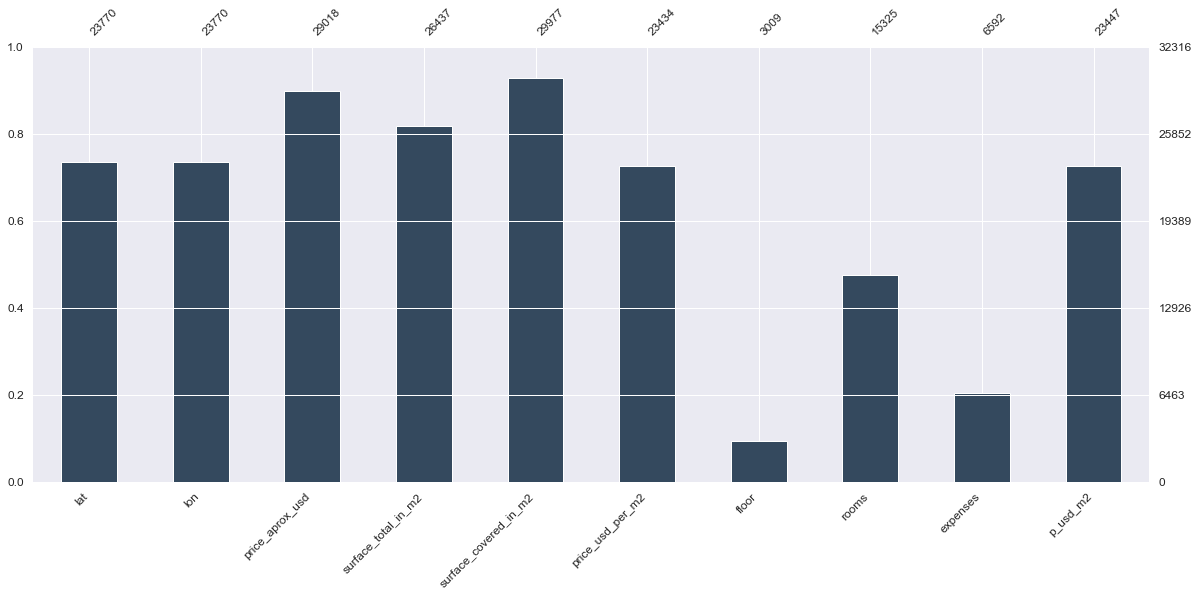

In [20]:
missingValueColumns = caba.columns[caba.isnull().any()].tolist()
msno.bar(caba[missingValueColumns],\
            figsize=(20,8),color="#34495e",fontsize=12,labels=True,)

<AxesSubplot:>

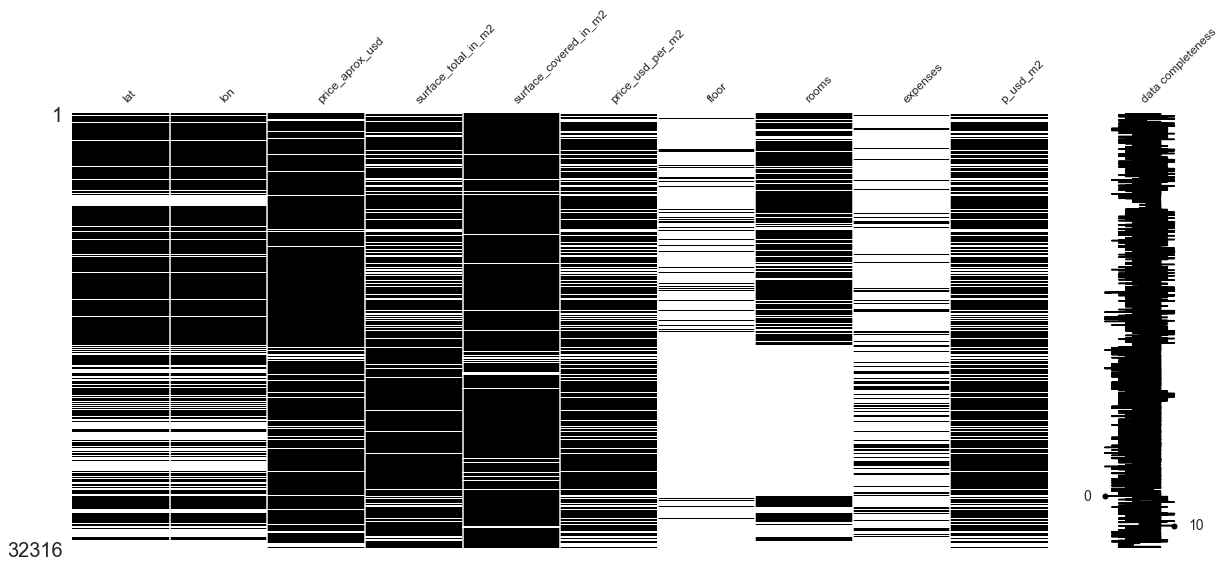

In [21]:
msno.matrix(caba[missingValueColumns],width_ratios=(10,1),\
            figsize=(20,8),color=(0,0, 0),fontsize=12,sparkline=True,labels=True)

<a id="section_price_1000"></a> 
## price_usd_per_m2 / p_usd_m2
* missing
* outliers

[volver a TOC](#section_toc)

**Missing**

Consideramos que imputar los valores missing de la variable target price_usd_per_m2 podria afectar nuestro data set y luego afectar nuestro futuro modelo de prediccion. Por lo que optamos por eliminarlos.

**Outliers**

Analizamos los graficos. Evaluamos y aplicamos un limite por juicio propio o limite por busines decision de 50.000 USD/m2.

In [22]:
caba = caba.dropna(subset=["price_usd_per_m2"]) #Droping the missing values 

In [23]:
#caba = caba.dropna(subset=["p_usd_m2"]) #Droping the missing values #p_usd_m2

<AxesSubplot:title={'center':'Price in USD per m2'}, xlabel='price_usd_per_m2'>

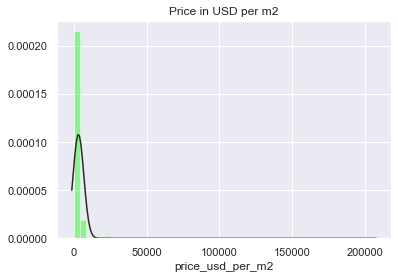

In [24]:
import scipy.stats as st 

y = caba["price_usd_per_m2"]
plt.figure(2); plt.title('Price in USD per m2')
sns.distplot(y, kde=False, fit=st.norm, color = 'lime')

<AxesSubplot:xlabel='price_usd_per_m2'>

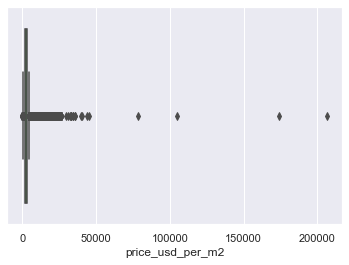

In [25]:
sns.boxplot(y , color='lime')

<AxesSubplot:title={'center':'Distribucion de precio por m2 en USD'}, xlabel='price_usd_per_m2'>

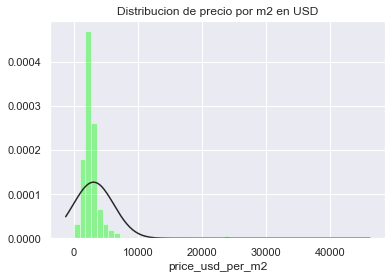

In [26]:
y = caba[caba['price_usd_per_m2']<= 50000]['price_usd_per_m2']
plt.figure(2); plt.title('Distribucion de precio por m2 en USD')
sns.distplot(y, kde=False, fit=st.norm, color = "lime")

<AxesSubplot:xlabel='price_usd_per_m2'>

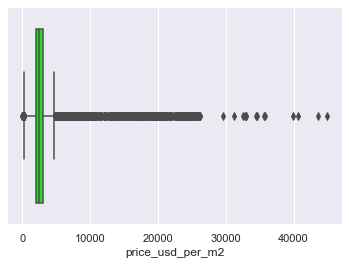

In [27]:
sns.boxplot(y , color='lime')

In [28]:
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23434 entries, 0 to 121219
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          23434 non-null  object 
 1   place_name             23434 non-null  object 
 2   lat                    17217 non-null  float64
 3   lon                    17217 non-null  float64
 4   price_aprox_usd        23434 non-null  float64
 5   surface_total_in_m2    23434 non-null  float64
 6   surface_covered_in_m2  22319 non-null  float64
 7   price_usd_per_m2       23434 non-null  float64
 8   floor                  1405 non-null   float64
 9   rooms                  10554 non-null  float64
 10  expenses               5929 non-null   float64
 11  properati_url          23434 non-null  object 
 12  description            23434 non-null  object 
 13  title                  23434 non-null  object 
 14  p_usd_m2               23434 non-null  float64
dtypes

In [29]:
caba.drop(caba.columns[[14]], axis=1, inplace=True)
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23434 entries, 0 to 121219
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          23434 non-null  object 
 1   place_name             23434 non-null  object 
 2   lat                    17217 non-null  float64
 3   lon                    17217 non-null  float64
 4   price_aprox_usd        23434 non-null  float64
 5   surface_total_in_m2    23434 non-null  float64
 6   surface_covered_in_m2  22319 non-null  float64
 7   price_usd_per_m2       23434 non-null  float64
 8   floor                  1405 non-null   float64
 9   rooms                  10554 non-null  float64
 10  expenses               5929 non-null   float64
 11  properati_url          23434 non-null  object 
 12  description            23434 non-null  object 
 13  title                  23434 non-null  object 
dtypes: float64(9), object(5)
memory usage: 2.7+ MB


In [30]:
caba.price_usd_per_m2.describe()

count     23434.000000
mean       3116.930444
std        3681.030087
min          13.797467
25%        1966.062830
50%        2468.750000
75%        3076.923077
max      206333.333333
Name: price_usd_per_m2, dtype: float64

In [31]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]


,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,lat,6217,0.265298
3,lon,6217,0.265298
4,price_aprox_usd,0,0.000000
5,surface_total_in_m2,0,0.000000
6,surface_covered_in_m2,1115,0.047580
7,price_usd_per_m2,0,0.000000
8,floor,22029,0.940044
9,rooms,12880,0.549629


<a id="section_surface"></a> 
## surface_covered_in_m2

* outliers (IQR, businees)
* valores faltantes

[volver a TOC](#section_toc)

In [32]:
caba.surface_covered_in_m2.isnull().sum()

1115

Reemplazamos los missing de sup covered con total.

In [33]:
caba['surface_covered_in_m2'] = caba.surface_covered_in_m2.fillna(caba['surface_total_in_m2'])

In [34]:
caba.surface_covered_in_m2.isnull().sum()

0

count     23434.000000
mean         99.868567
std        1317.990150
min           0.000000
25%          38.000000
50%          55.000000
75%          96.000000
max      200000.000000
Name: surface_covered_in_m2, dtype: float64


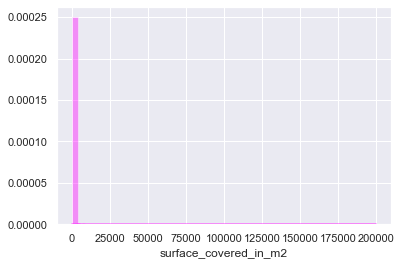

In [35]:
print(caba.surface_covered_in_m2.describe()) #Observamos los valores de surface covered
sns.distplot(caba['surface_covered_in_m2'],  color = 'fuchsia')
plt.show()

<AxesSubplot:xlabel='surface_covered_in_m2'>

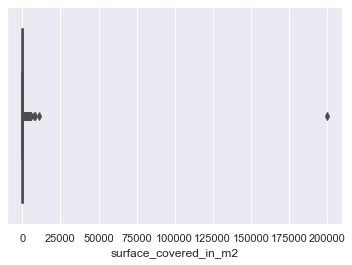

In [36]:
sns.boxplot(caba['surface_covered_in_m2'],  color = 'fuchsia')

count    23387.000000
mean        91.498311
std        178.285672
min         18.000000
25%         38.000000
50%         55.000000
75%         96.000000
max      10958.000000
Name: surface_covered_in_m2, dtype: float64


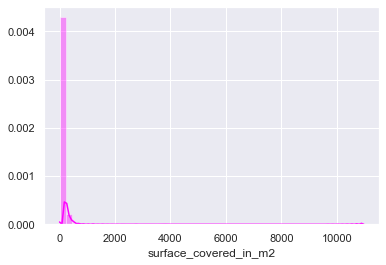

<AxesSubplot:xlabel='surface_covered_in_m2'>

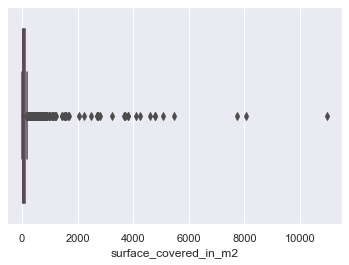

In [37]:
caba = caba[caba['surface_covered_in_m2']<= 25000]
caba = caba[caba['surface_covered_in_m2']>= 18] #como minimo un departamente tiene que tener 18 m cuadrados

print(caba.surface_covered_in_m2.describe()) #Observamos los valores de surface covered
sns.distplot(caba['surface_covered_in_m2'],  color = 'fuchsia')
plt.show()

sns.boxplot(caba['surface_covered_in_m2'],  color = 'fuchsia')

In [38]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]


,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,lat,6212,0.265618
3,lon,6212,0.265618
4,price_aprox_usd,0,0.000000
5,surface_total_in_m2,0,0.000000
6,surface_covered_in_m2,0,0.000000
7,price_usd_per_m2,0,0.000000
8,floor,21989,0.940223
9,rooms,12848,0.549365


<a id="section_room"></a> 
## room

[volver a TOC](#section_toc)

In [39]:
#REGEX

import re

pattern_ambientes = r'(?P<amb>\d+)(\s)(\b(ambientes|ambiente|amb|cuarto|cuartos|habitacion|habitaciones|dormitorio|dormitorios|dorm|hab)\b)'
pattern_ambientes_regex = re.compile(pattern_ambientes)
description_series = caba.title.astype(str)
resultado_ambientes = description_series.apply(lambda x: x if x is np.nan else pattern_ambientes_regex.search(x))
ambientes_match = resultado_ambientes.apply(lambda x: x if x is None else x.group('amb'))

In [40]:
ambientes_match.value_counts()

3     1137
2     1047
4      651
1      425
5      184
6       46
7       19
8       13
9        4
10       2
14       2
11       1
27       1
15       1
20       1
Name: title, dtype: int64

In [41]:
caba['rooms'] = caba['rooms'].fillna(ambientes_match)

In [42]:
caba.rooms.isnull().value_counts()

False    11990
True     11397
Name: rooms, dtype: int64

Se redujeron los missing de romms gracias a regex en title, si corremos el regex en description y hacemos value counts salen cantidad de cuartos raros.

Asimismo, los otros missing de la variable rooms que podemos reemplazar:

con la moda o 
con una proporcion 0.55 y 0.45 de los dos mayores valores. 

Optamos por la segunda opcion.

Pero antes tenemso que convertir a rooms es int.

In [43]:
caba.rooms.value_counts() #Hay que hacerla int

1.0     2817
3.0     2454
2.0     2448
4.0     1793
5.0      672
3        449
2        448
4        287
6.0      197
1        120
7.0       97
5         93
8.0       31
6         30
7         10
9.0        8
8          8
12.0       8
10.0       8
11.0       3
11         1
13.0       1
14.0       1
20         1
14         1
15         1
27         1
10         1
15.0       1
Name: rooms, dtype: int64

In [44]:
caba['rooms'] = pd.to_numeric(caba.rooms)

In [45]:
caba.rooms.value_counts() #int La mayoeia son de 1 y 3 cuartos

1.0     2937
3.0     2903
2.0     2896
4.0     2080
5.0      765
6.0      227
7.0      107
8.0       39
10.0       9
12.0       8
9.0        8
11.0       4
15.0       2
14.0       2
20.0       1
27.0       1
13.0       1
Name: rooms, dtype: int64

In [46]:
def count_plotter(data, label, labelsize=12):    
    sns.set(rc={"figure.figsize": (10, 7), 
                "xtick.labelsize": labelsize})
    sns.set_style("white")    
    data_count = sns.countplot(data)
    data_count.set_title('Histograma de ' + label + '\n', fontsize=16)

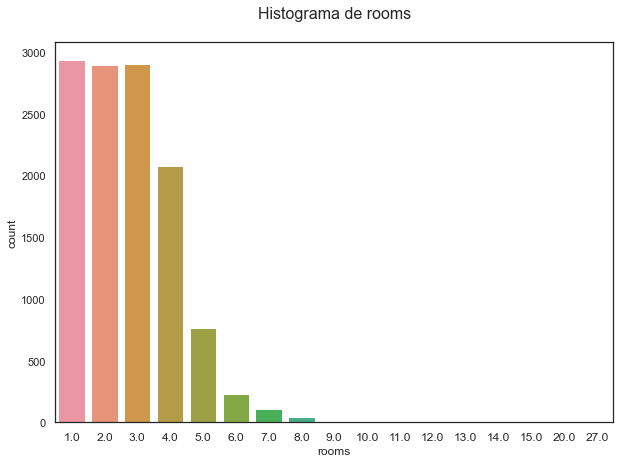

In [47]:
count_plotter(caba.rooms, "rooms")

In [48]:
#Cantidad de nulos, 1  3  rooms:
cant_car_null = caba.rooms.isnull().sum()
print("# nulos en rooms: ",cant_car_null)

car_three_mask = caba.rooms == 1
cant_car_3 = car_three_mask.sum()
print("# 3 en rooms: ",cant_car_3)

car_four_mask = caba.rooms == 3
cant_car_4 = car_four_mask.sum()
print("# 4 en rooms: ",cant_car_4)

# nulos en rooms:  11397
# 3 en rooms:  2937
# 4 en rooms:  2903


In [49]:
# los registros que son null en Car:
data_car_null_mask = caba.rooms.isnull()
data_car_null = caba.loc[data_car_null_mask, :]
print(data_car_null.shape[0])


# una muestra del 45% de los registros calculados en el paso anterior:
data_car_null_mask_sample_1 = data_car_null.sample(frac = 0.45)


# los índices de ese 45%
data_car_null_ones_index = data_car_null_mask_sample_1.index
print(len(data_car_null_ones_index))


# los que van a ser rellenados con valor 2 son todos los que no fueron seleccionados en el paso anterior:
data_car_null_twos_index = data_car_null.index.difference(data_car_null_ones_index)
print(len(data_car_null_twos_index))

11397
5129
6268


In [50]:
caba.loc[data_car_null_ones_index, "rooms"] = 3
caba.loc[data_car_null_twos_index, "rooms"] = 1

In [51]:
cant_car_null = caba.rooms.isnull().sum()
print(cant_car_null)

car_one_mask = caba.rooms == 4
cant_car_1 = car_one_mask.sum()
print(cant_car_1)

car_two_mask = caba.rooms == 3
cant_car_2 = car_two_mask.sum()
print(cant_car_2)

0
2080
8032


In [52]:
caba.rooms.value_counts() 

1.0     9205
3.0     8032
2.0     2896
4.0     2080
5.0      765
6.0      227
7.0      107
8.0       39
10.0       9
12.0       8
9.0        8
11.0       4
15.0       2
14.0       2
20.0       1
27.0       1
13.0       1
Name: rooms, dtype: int64

In [53]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]


,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,lat,6212,0.265618
3,lon,6212,0.265618
4,price_aprox_usd,0,0.000000
5,surface_total_in_m2,0,0.000000
6,surface_covered_in_m2,0,0.000000
7,price_usd_per_m2,0,0.000000
8,floor,21989,0.940223
9,rooms,0,0.000000


<a id="section_exp2"></a> 
## expenses

[volver a TOC](#section_toc)

In [54]:
#REGEX

pattern_exp = r'(\b(expensas|expensa)\b)(\s)($)(?P<exp>\d+)'
pattern_exp_regex = re.compile(pattern_exp)
description_series = caba.properati_url.astype(str)
resultado_exp = description_series.apply(lambda x: x if x is np.nan else pattern_exp_regex.search(x))
exp_match = resultado_exp.apply(lambda x: x if x is None else x.group('exp'))

In [55]:
exp_match.value_counts()

Series([], Name: properati_url, dtype: int64)

Probamos regex, sin resultados.

Reemplazamos por media por cantidad de cuartos y barrio.

In [56]:
caba.groupby(['rooms'])['expenses'].median() #parece mas estable que mean

rooms
1.0     1900.0
2.0     1500.0
3.0     2000.0
4.0     4000.0
5.0     8600.0
6.0     4000.0
7.0     4800.0
8.0     7000.0
9.0        NaN
10.0       NaN
11.0    1700.0
12.0       NaN
13.0       NaN
14.0       NaN
15.0       NaN
20.0       NaN
27.0       NaN
Name: expenses, dtype: float64

In [57]:
caba.groupby(['rooms'])['expenses'].mean()

rooms
1.0      3208.506855
2.0     32606.516179
3.0      3160.470613
4.0      5206.226496
5.0     10745.976744
6.0     10326.086957
7.0      6392.923077
8.0      7000.000000
9.0              NaN
10.0             NaN
11.0     1700.000000
12.0             NaN
13.0             NaN
14.0             NaN
15.0             NaN
20.0             NaN
27.0             NaN
Name: expenses, dtype: float64

In [58]:
caba.groupby(['place_name','rooms'])['expenses'].median()

place_name        rooms
Abasto            1.0       1575.0
                  2.0       1390.0
                  3.0       1569.0
                  4.0       2100.0
                  5.0        500.0
                            ...   
Villa del Parque  3.0       1500.0
                  4.0       2500.0
                  5.0          NaN
                  6.0          NaN
                  7.0      10000.0
Name: expenses, Length: 414, dtype: float64

Decidimos reemplazar los missing con la **mediana** de expensas segun la cantidad de cuartos del apartamento.  

In [59]:
caba['expenses'].fillna(caba.groupby(['place_name','rooms'])['expenses'].transform('median'),inplace=True)

In [ ]:
#para cada grupo ver lso no NA y luego 

In [60]:
#Carlos dijo que lo de arriba no era el mejor procedieminto

In [61]:
print("Missing de la variable expenses: ", caba['expenses'].isnull().sum())

Missing de la variable expenses:  658


In [62]:
caba.expenses.isnull().value_counts()

False    22729
True       658
Name: expenses, dtype: int64

Los pocos missing que quedan los dropeamos porque reemplazar por la media de expensas da algo rarisimo.

In [63]:
caba= caba.dropna(subset=["expenses"]) #dropna

In [64]:
caba.expenses.isnull().value_counts()

False    22729
Name: expenses, dtype: int64

In [65]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]


,column_name,missing_count,missing_ratio
0,property_type,0,0.000000
1,place_name,0,0.000000
2,lat,6165,0.271239
3,lon,6165,0.271239
4,price_aprox_usd,0,0.000000
5,surface_total_in_m2,0,0.000000
6,surface_covered_in_m2,0,0.000000
7,price_usd_per_m2,0,0.000000
8,floor,21337,0.938757
9,rooms,0,0.000000


In [66]:
caba.expenses.value_counts()

1500.0     2024
1800.0     1283
2800.0     1202
1200.0     1061
3000.0      929
           ... 
3150.0        1
1460.0        1
2690.0        1
9950.0        1
22527.0       1
Name: expenses, Length: 748, dtype: int64

In [67]:
caba['expenses'] = round(caba['expenses'],0)

count    2.272900e+04
mean     3.621332e+03
std      9.383367e+04
min      1.000000e+00
25%      1.500000e+03
50%      1.947000e+03
75%      2.950000e+03
max      1.000150e+07
Name: expenses, dtype: float64


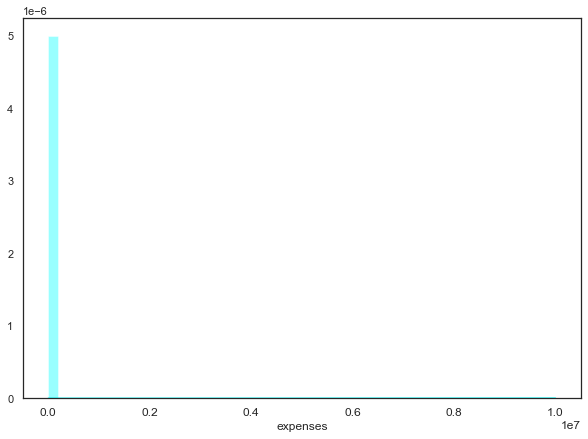

<AxesSubplot:xlabel='expenses'>

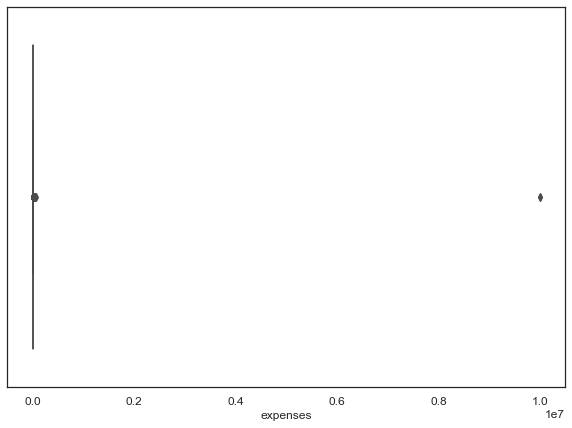

In [68]:
print(caba.expenses.describe()) 
sns.distplot(caba['expenses'],  color = 'aqua') #no entiendo estos graficos
plt.show()

sns.boxplot(caba['expenses'], color = 'aqua')

In [69]:
caba = caba[caba['expenses']<= 60000] #sacamos el outlier

count    22726.000000
mean      2738.548139
std       2792.865134
min          1.000000
25%       1500.000000
50%       1947.000000
75%       2950.000000
max      54240.000000
Name: expenses, dtype: float64


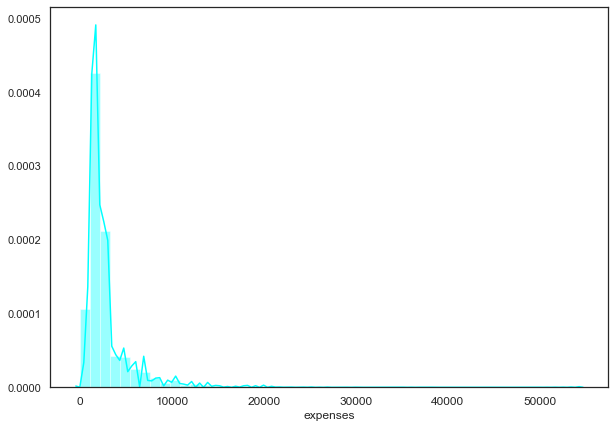

<AxesSubplot:xlabel='expenses'>

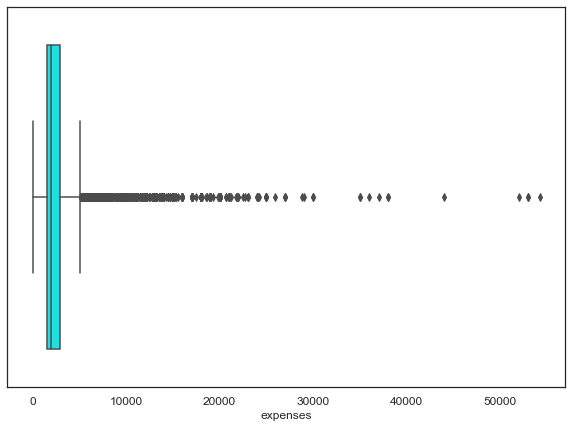

In [70]:
print(caba.expenses.describe()) 
sns.distplot(caba['expenses'],  color = 'aqua') #no entiendo estos graficos
plt.show()

sns.boxplot(caba['expenses'], color = 'aqua')

In [71]:
caba.shape

(22726, 14)

<a id="section_floor"></a> 
## floor

[volver a TOC](#section_toc)

In [72]:
caba.floor.value_counts()

1.0      296
2.0      228
3.0      177
4.0      119
5.0      110
6.0      108
7.0       89
8.0       60
9.0       53
10.0      44
11.0      32
12.0      23
13.0      17
14.0       9
15.0       8
17.0       5
27.0       3
16.0       3
22.0       3
18.0       2
117.0      1
20.0       1
21.0       1
Name: floor, dtype: int64

REGEX

In [73]:


pattern_exp = r'(\b(piso|pisos)\b)(\s)(?P<piso>\d+)'
pattern_exp_regex = re.compile(pattern_exp)
description_series = caba.description.astype(str)
resultado_exp = description_series.apply(lambda x: x if x is np.nan else pattern_exp_regex.search(x))
exp_match = resultado_exp.apply(lambda x: x if x is None else x.group('piso'))


In [74]:
exp_match

0         None
2         None
7         None
8         None
13        None
          ... 
121160       1
121209       1
121215    None
121217    None
121219    None
Name: description, Length: 22726, dtype: object

In [75]:
exp_match.value_counts()

10     93
6      71
9      71
18     67
8      62
1      56
4      54
2      48
13     46
15     44
11     40
14     35
28     29
7      23
3      22
12     17
5      15
27     11
29     11
46      6
25      6
26      5
16      5
20      5
33      5
17      4
24      4
19      3
23      3
45      2
22      2
34      2
40      2
63      1
54      1
220     1
255     1
31      1
102     1
36      1
49      1
35      1
82      1
30      1
56      1
32      1
52      1
60      1
Name: description, dtype: int64

In [76]:
caba['floor'].fillna(exp_match)

0         None
2         None
7         None
8         None
13        None
          ... 
121160       1
121209       1
121215    None
121217    None
121219    None
Name: floor, Length: 22726, dtype: object

In [77]:
caba['floor'].isnull().value_counts()

True     21334
False     1392
Name: floor, dtype: int64

In [78]:
caba['floor'].isnull().sum()

21334

In [79]:
caba.shape

(22726, 14)

In [80]:
caba.floor.value_counts()

1.0      296
2.0      228
3.0      177
4.0      119
5.0      110
6.0      108
7.0       89
8.0       60
9.0       53
10.0      44
11.0      32
12.0      23
13.0      17
14.0       9
15.0       8
17.0       5
27.0       3
16.0       3
22.0       3
18.0       2
117.0      1
20.0       1
21.0       1
Name: floor, dtype: int64

In [81]:
caba = caba[caba['floor']<= 30] #sacamos el outlier y los missing

In [82]:
caba.shape

(1391, 14)

In [83]:
# # caba_floor = caba
# caba_floor['floor']= caba.floor.fillna(1)
# caba_floor.shape
# caba_floor = caba_floor[caba_floor['floor']<= 30] #sacamos el outlier

In [84]:
caba['floor'].isnull().sum()

0

In [85]:
# mode = caba.floor.mode()
# caba = caba.floor.fillna(mode)
caba.floor.value_counts()

1.0     296
2.0     228
3.0     177
4.0     119
5.0     110
6.0     108
7.0      89
8.0      60
9.0      53
10.0     44
11.0     32
12.0     23
13.0     17
14.0      9
15.0      8
17.0      5
22.0      3
27.0      3
16.0      3
18.0      2
20.0      1
21.0      1
Name: floor, dtype: int64

In [86]:
# caba = caba_floor

In [87]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.

,column_name,missing_count,missing_ratio
0,property_type,0,0.00000
1,place_name,0,0.00000
2,lat,82,0.05895
3,lon,82,0.05895
4,price_aprox_usd,0,0.00000
5,surface_total_in_m2,0,0.00000
6,surface_covered_in_m2,0,0.00000
7,price_usd_per_m2,0,0.00000
8,floor,0,0.00000
9,rooms,0,0.00000


<a id="section_latlo"></a> 
## latlon

[volver a TOC](#section_toc)

In [88]:
caba= caba.dropna(subset=["lat"]) #dropna

In [89]:
caba= caba.dropna(subset=["lon"]) #dropna

In [90]:
missing_df = caba.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / caba.shape[0]
missing_df#.ix[missing_df['missing_ratio']>0.999]


,column_name,missing_count,missing_ratio
0,property_type,0,0.0
1,place_name,0,0.0
2,lat,0,0.0
3,lon,0,0.0
4,price_aprox_usd,0,0.0
5,surface_total_in_m2,0,0.0
6,surface_covered_in_m2,0,0.0
7,price_usd_per_m2,0,0.0
8,floor,0,0.0
9,rooms,0,0.0


In [91]:
caba.shape

(1309, 14)

<a id="section_des"></a> 
## descriptivas

[volver a TOC](#section_toc)

In [92]:
plt.style.use('dark_background')

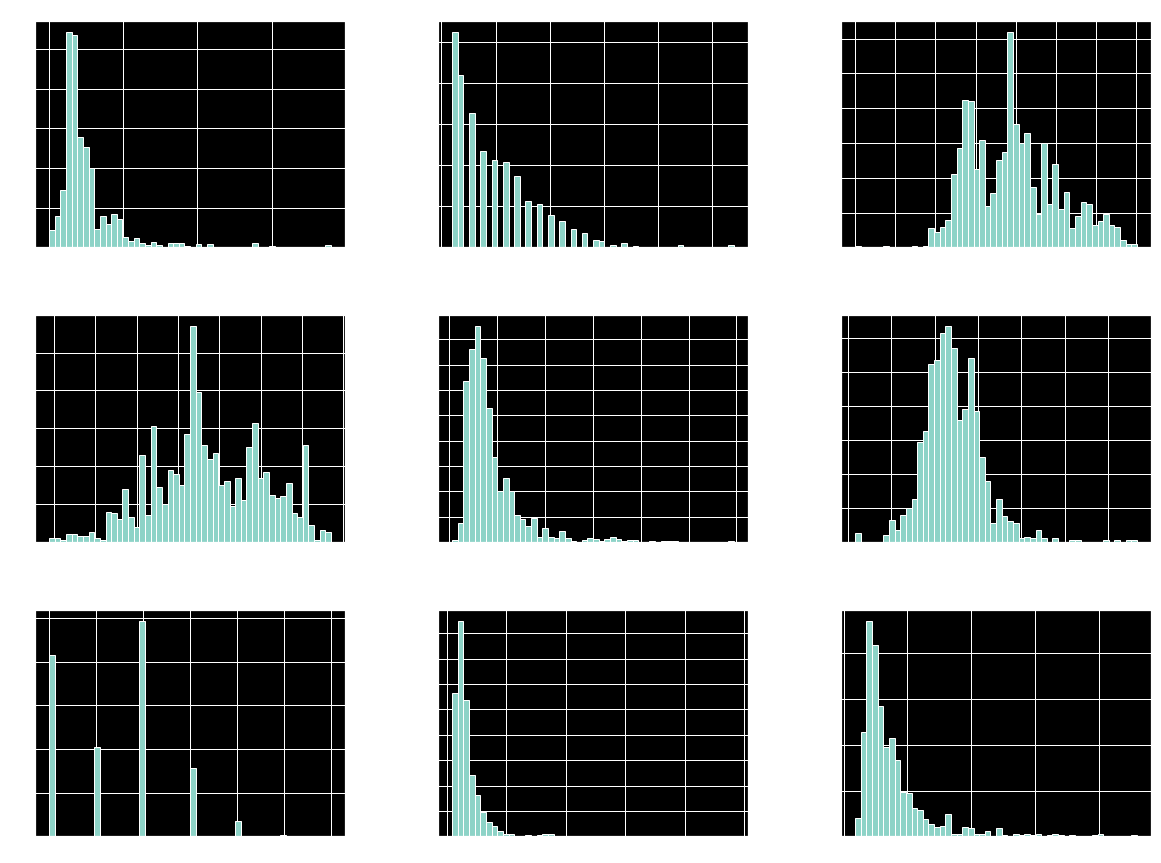

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
caba.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

Some of the histograms are a little bit right skewed, but this is not abnormal.

<a id="section_latlon"></a> 
## latlon

[volver a TOC](#section_toc)

/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

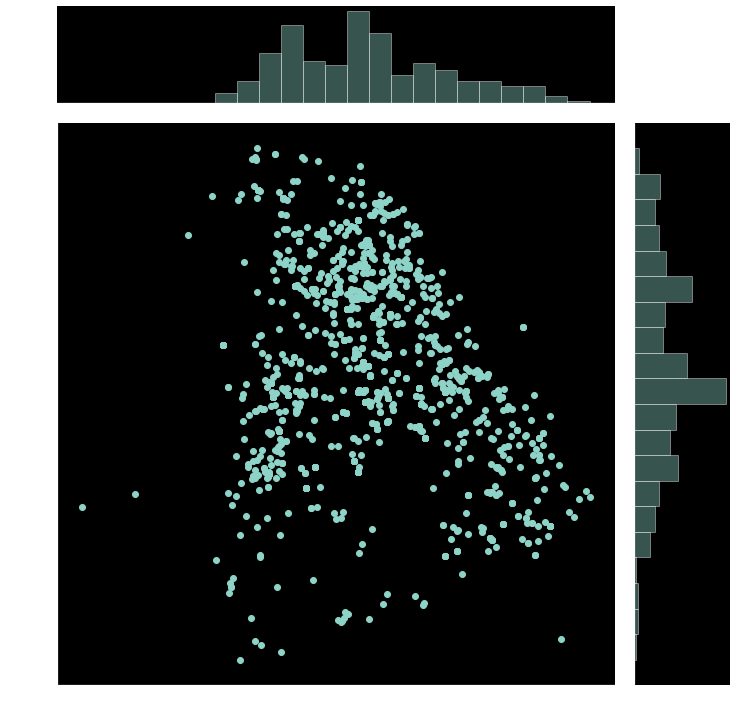

In [94]:
plt.figure(figsize=(12,12))
sns.jointplot(x=caba.lat.values, y=caba.lon.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

Pareceria que hay mas datos en la parte norte y este de CABA.

<a id="section_corr"></a> 
## correlacion

[volver a TOC](#section_toc)

In [95]:
caba.columns

Index(['property_type', 'place_name', 'lat', 'lon', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'floor', 'rooms', 'expenses', 'properati_url', 'description', 'title'],
      dtype='object')

In [96]:
sns.set_style("darkgrid")

<AxesSubplot:>

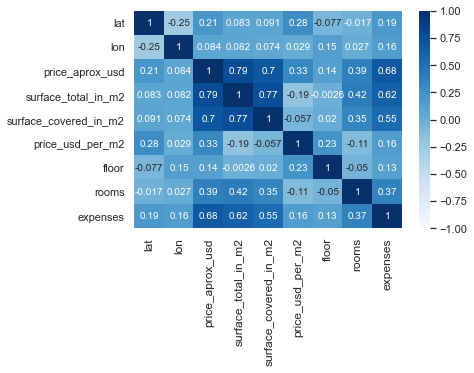

In [97]:
sns.heatmap(caba.corr(), annot=True, vmin=-1, cmap='Blues')

surface_total_in_m2 y surface_covered_in_m2 tienen alta y positiva correlacion con price_aprox_usd. Sin embargo, esa relacion disminuye muchisimo e incluso es negativa con price_usd_per_m2 

Vemos que la variable surface_total_in_m2 y surface_covered_in_m2 (0.77) tiene una alta correlacion, por lo que creamos una nueva variable surface_uncovered_in_m2.

In [98]:
corr_matrix = caba.corr()
corr_matrix["price_usd_per_m2"].sort_values(ascending=False)

price_usd_per_m2         1.000000
price_aprox_usd          0.329343
lat                      0.284933
floor                    0.226944
expenses                 0.156716
lon                      0.028666
surface_covered_in_m2   -0.056533
rooms                   -0.106822
surface_total_in_m2     -0.186933
Name: price_usd_per_m2, dtype: float64

Estas correlaciones y relaciones con la variable dependiente tienen sentido:
* A mayor latitud, es decir mas al norte de CABA, aumenta el precio. Correcto?
* A mayor piso, aqui segurametne estamos apuntando a departamentos, aumenta el precio.
* Cuanto mas expensas, aumenta el preico.
* A mayor longitud, aunque poca, aumenta el precio.

Correlaciones negativas no claras:
* sup_covered
* rooms
* sup_total

In [99]:
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 351 to 119826
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          1309 non-null   object 
 1   place_name             1309 non-null   object 
 2   lat                    1309 non-null   float64
 3   lon                    1309 non-null   float64
 4   price_aprox_usd        1309 non-null   float64
 5   surface_total_in_m2    1309 non-null   float64
 6   surface_covered_in_m2  1309 non-null   float64
 7   price_usd_per_m2       1309 non-null   float64
 8   floor                  1309 non-null   float64
 9   rooms                  1309 non-null   float64
 10  expenses               1309 non-null   float64
 11  properati_url          1309 non-null   object 
 12  description            1309 non-null   object 
 13  title                  1309 non-null   object 
dtypes: float64(9), object(5)
memory usage: 153.4+ KB


In [100]:
caba.drop(caba.columns[[4]], axis=1, inplace=True)
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 351 to 119826
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          1309 non-null   object 
 1   place_name             1309 non-null   object 
 2   lat                    1309 non-null   float64
 3   lon                    1309 non-null   float64
 4   surface_total_in_m2    1309 non-null   float64
 5   surface_covered_in_m2  1309 non-null   float64
 6   price_usd_per_m2       1309 non-null   float64
 7   floor                  1309 non-null   float64
 8   rooms                  1309 non-null   float64
 9   expenses               1309 non-null   float64
 10  properati_url          1309 non-null   object 
 11  description            1309 non-null   object 
 12  title                  1309 non-null   object 
dtypes: float64(8), object(5)
memory usage: 143.2+ KB


<a id="section_uncovered"></a> 
## sup_uncovered

[volver a TOC](#section_toc)

In [101]:
caba['surface_uncovered_in_m2'] = caba['surface_total_in_m2'] - caba['surface_covered_in_m2']

In [102]:
caba.columns

Index(['property_type', 'place_name', 'lat', 'lon', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'properati_url', 'description', 'title',
       'surface_uncovered_in_m2'],
      dtype='object')

In [103]:
caba.surface_uncovered_in_m2.describe()

count    1309.000000
mean        8.401070
std        34.483126
min      -844.000000
25%         0.000000
50%         4.000000
75%         8.000000
max       314.000000
Name: surface_uncovered_in_m2, dtype: float64

In [104]:
#pos = caba.loc[caba['surface_uncovered_in_m2'] > 0, 'surface_uncovered_in_m2']

In [105]:
#pos.describe()

In [106]:
#caba['surface_uncovered_in_m2'] = caba.loc[caba['surface_uncovered_in_m2'] > 0, 'surface_uncovered_in_m2']

In [107]:
#caba['surface_uncovered_in_m2'].describe()

In [108]:
corr_matrix = caba.corr()
corr_matrix["price_usd_per_m2"].sort_values(ascending=False)

price_usd_per_m2           1.000000
lat                        0.284933
floor                      0.226944
expenses                   0.156716
lon                        0.028666
surface_covered_in_m2     -0.056533
rooms                     -0.106822
surface_total_in_m2       -0.186933
surface_uncovered_in_m2   -0.200426
Name: price_usd_per_m2, dtype: float64

array([[<AxesSubplot:xlabel='price_usd_per_m2', ylabel='price_usd_per_m2'>,
        <AxesSubplot:xlabel='floor', ylabel='price_usd_per_m2'>,
        <AxesSubplot:xlabel='expenses', ylabel='price_usd_per_m2'>,
        <AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_usd_per_m2'>,
        <AxesSubplot:xlabel='surface_uncovered_in_m2', ylabel='price_usd_per_m2'>],
       [<AxesSubplot:xlabel='price_usd_per_m2', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='expenses', ylabel='floor'>,
        <AxesSubplot:xlabel='surface_covered_in_m2', ylabel='floor'>,
        <AxesSubplot:xlabel='surface_uncovered_in_m2', ylabel='floor'>],
       [<AxesSubplot:xlabel='price_usd_per_m2', ylabel='expenses'>,
        <AxesSubplot:xlabel='floor', ylabel='expenses'>,
        <AxesSubplot:xlabel='expenses', ylabel='expenses'>,
        <AxesSubplot:xlabel='surface_covered_in_m2', ylabel='expenses'>,
        <AxesSubplot:xlabel='surface_uncovered_in

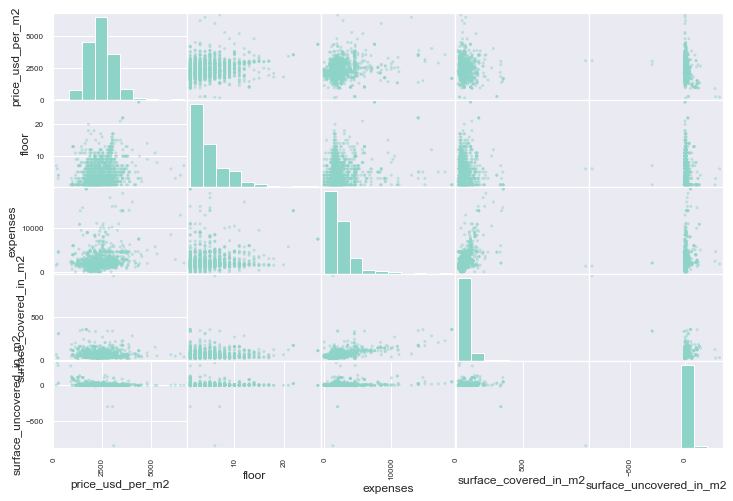

In [109]:
attributes = ["price_usd_per_m2", "floor","expenses","surface_covered_in_m2", "surface_uncovered_in_m2"]
pd.plotting.scatter_matrix(caba[attributes], figsize=(12, 8))
#plt.savefig('matrix.png')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


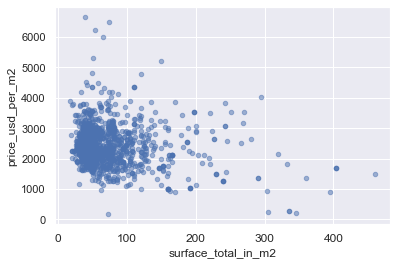

In [110]:
caba.plot(kind="scatter", x="surface_total_in_m2", y="price_usd_per_m2", alpha=0.5)
plt.savefig('scatter.png')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


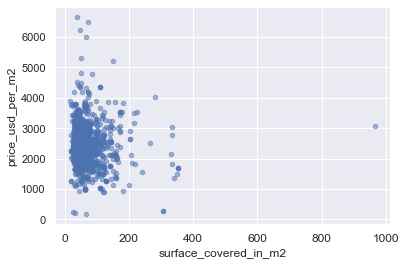

In [111]:
caba.plot(kind="scatter", x="surface_covered_in_m2", y="price_usd_per_m2", alpha=0.5)
plt.savefig('scatter.png')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


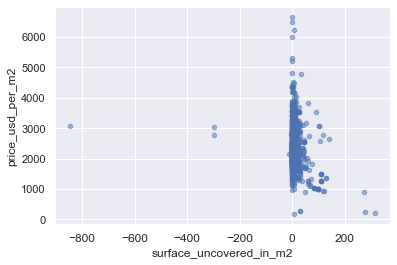

In [112]:
caba.plot(kind="scatter", x="surface_uncovered_in_m2", y="price_usd_per_m2", alpha=0.5)
plt.savefig('scatter.png')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


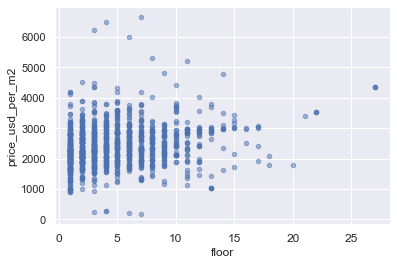

In [113]:
caba.plot(kind="scatter", x="floor", y="price_usd_per_m2", alpha=0.5)
plt.savefig('scatter.png')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


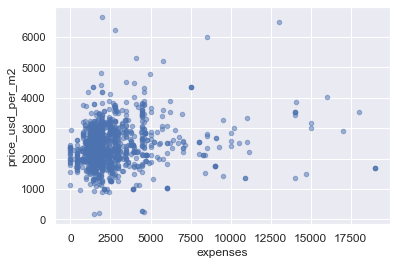

In [114]:
caba.plot(kind="scatter", x="expenses", y="price_usd_per_m2", alpha=0.5)
plt.savefig('scatter.png')

<a id="section_barrios"></a> 
## barrios

[volver a TOC](#section_toc)

In [115]:
len(caba['place_name'].value_counts())

53

In [116]:
c = caba.groupby('place_name').count()['price_usd_per_m2']
c.sort_values(axis=0, ascending=False)

place_name
Caballito               177
Palermo                 116
Villa Crespo             87
Flores                   83
Almagro                  73
Belgrano                 71
Balvanera                69
Recoleta                 59
Barrio Norte             53
San Cristobal            42
San Telmo                41
Villa Urquiza            39
Parque Centenario        29
Saavedra                 26
Palermo Hollywood        25
Chacarita                23
Congreso                 23
Paternal                 21
Colegiales               19
Parque Chacabuco         19
Coghlan                  17
Centro / Microcentro     16
Barracas                 15
Nuñez                    15
Once                     12
Retiro                   10
Tribunales               10
Villa Devoto             10
Las Cañitas               9
Monserrat                 8
Capital Federal           8
Abasto                    8
Villa del Parque          7
Floresta                  7
Villa Luro                7
Boedo    

In [117]:
a = caba.groupby('place_name').mean()['price_usd_per_m2']
a.sort_values(axis=0, ascending=False)

place_name
Puerto Madero           6111.817700
Palermo Chico           3654.917818
Las Cañitas             3357.754559
Palermo Soho            3278.481013
Palermo Viejo           3277.310924
Palermo Hollywood       3037.815778
Recoleta                2969.686168
Villa Ortuzar           2909.090909
Belgrano                2868.394727
Barrio Norte            2820.585647
Retiro                  2778.611358
Palermo                 2732.736277
Capital Federal         2698.036999
Caballito               2614.160802
Villa Urquiza           2575.598676
San Telmo               2486.024430
Nuñez                   2467.558802
Colegiales              2453.459318
Coghlan                 2444.892325
Villa Devoto            2355.518702
Villa Santa Rita        2352.941176
Villa Crespo            2322.232690
Parque Centenario       2296.229995
Paternal                2290.543099
San Nicolás             2281.101190
Saavedra                2224.292367
Centro / Microcentro    2209.496916
Monte Castro     

In [118]:
b = caba.groupby('place_name').median()['price_usd_per_m2']
b.sort_values(axis=0, ascending=False)

place_name
Puerto Madero           6243.243243
Palermo Chico           3575.233948
Palermo Soho            3278.481013
Palermo Viejo           3277.310924
Las Cañitas             3142.857143
Palermo Hollywood       3086.419753
Recoleta                3055.555556
Villa Ortuzar           2909.090909
Belgrano                2902.439024
Capital Federal         2821.141710
Caballito               2728.571429
Palermo                 2704.166667
Barrio Norte            2678.571429
San Telmo               2669.346154
Retiro                  2547.777778
Villa Urquiza           2541.666667
Nuñez                   2431.818182
Coghlan                 2421.052632
Colegiales              2407.407407
Villa Santa Rita        2352.941176
Paternal                2326.622500
San Nicolás             2316.666667
Villa Crespo            2295.081967
Chacarita               2283.783784
Villa Devoto            2259.759760
Parque Centenario       2239.436620
Monte Castro            2200.000000
Monserrat        

Podemos ver que la variable dependiente tiene coherencia respecto a los distintos barrios.

In [119]:
#caba.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

Agrupamiento de barrios

In [120]:
freq = caba.groupby('place_name').count()['properati_url']
mean = caba.groupby('place_name').mean()['price_usd_per_m2']
cluster = pd.concat([freq, mean], axis=1)
cluster['place_name'] = cluster.index
cluster.columns = ['freq', 'price_usd_per_m2','place_name']
cluster.describe()

,freq,price_usd_per_m2
count,53.000000,53.000000
mean,24.698113,2368.666432
std,33.898369,719.072787
min,1.000000,1494.922695
25%,4.000000,1943.748192
50%,10.000000,2209.496916
75%,26.000000,2614.160802
max,177.000000,6111.817700


In [121]:
cluster1 = cluster[cluster.price_usd_per_m2 < 2179] #low price neighborhoods:
cluster1.index

Index(['Abasto', 'Almagro', 'Balvanera', 'Barracas', 'Boca', 'Boedo',
       'Chacarita', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Liniers', 'Monserrat', 'Once', 'Parque Chacabuco', 'Parque Patricios',
       'San Cristobal', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa General Mitre', 'Villa Lugano', 'Villa Luro', 'Villa Pueyrredón',
       'Villa del Parque'],
      dtype='object', name='place_name')

In [122]:
cluster_temp = cluster[cluster.price_usd_per_m2 >= 2180]#high price and low frequency neighborhoods
cluster2 = cluster_temp[cluster_temp.freq <10]
cluster2.index

Index(['Capital Federal', 'Las Cañitas', 'Monte Castro', 'Palermo Chico',
       'Palermo Soho', 'Palermo Viejo', 'Puerto Madero', 'San Nicolás',
       'Villa Ortuzar', 'Villa Santa Rita'],
      dtype='object', name='place_name')

In [123]:
cluster3 = cluster_temp[cluster_temp.freq >=10] #high price and high frequency neighborhoods
cluster3.index

Index(['Barrio Norte', 'Belgrano', 'Caballito', 'Centro / Microcentro',
       'Coghlan', 'Colegiales', 'Nuñez', 'Palermo', 'Palermo Hollywood',
       'Parque Centenario', 'Paternal', 'Recoleta', 'Retiro', 'Saavedra',
       'San Telmo', 'Villa Crespo', 'Villa Devoto', 'Villa Urquiza'],
      dtype='object', name='place_name')

In [124]:
def get_group(x):
    if x in cluster1.index:
        return 'low_price'
    elif x in cluster2.index:
        return 'high_price_low_freq'
    else:
        return 'high_price_high_freq'
    

In [125]:
caba['group'] = caba.place_name.apply(get_group)

create dummy variables for these two categorical variables: 

In [126]:
caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 351 to 119826
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            1309 non-null   object 
 1   place_name               1309 non-null   object 
 2   lat                      1309 non-null   float64
 3   lon                      1309 non-null   float64
 4   surface_total_in_m2      1309 non-null   float64
 5   surface_covered_in_m2    1309 non-null   float64
 6   price_usd_per_m2         1309 non-null   float64
 7   floor                    1309 non-null   float64
 8   rooms                    1309 non-null   float64
 9   expenses                 1309 non-null   float64
 10  properati_url            1309 non-null   object 
 11  description              1309 non-null   object 
 12  title                    1309 non-null   object 
 13  surface_uncovered_in_m2  1309 non-null   float64
 14  group               

<a id="section_property"></a> 
## property type y barrios

[volver a TOC](#section_toc)

In [127]:
caba.property_type.value_counts()

apartment    1246
PH             63
Name: property_type, dtype: int64

In [128]:
caba['place_name'].value_counts()

Caballito               177
Palermo                 116
Villa Crespo             87
Flores                   83
Almagro                  73
Belgrano                 71
Balvanera                69
Recoleta                 59
Barrio Norte             53
San Cristobal            42
San Telmo                41
Villa Urquiza            39
Parque Centenario        29
Saavedra                 26
Palermo Hollywood        25
Congreso                 23
Chacarita                23
Paternal                 21
Parque Chacabuco         19
Colegiales               19
Coghlan                  17
Centro / Microcentro     16
Nuñez                    15
Barracas                 15
Once                     12
Tribunales               10
Villa Devoto             10
Retiro                   10
Las Cañitas               9
Abasto                    8
Monserrat                 8
Capital Federal           8
Villa del Parque          7
Boedo                     7
Floresta                  7
Villa Luro          

In [129]:
n = pd.get_dummies(caba.place_name)
caba = pd.concat([caba, n], axis=1)
m = pd.get_dummies(caba.property_type)
caba = pd.concat([caba, m], axis=1)

drops = ['group', 'property_type', 'place_name']
caba.drop(drops, inplace=True, axis=1)
caba.head()

,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,description,...,Villa General Mitre,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Santa Rita,Villa Urquiza,Villa del Parque,PH,apartment
351,-34.603594,-58.465425,27.0,27.0,2283.540370,7.0,3.0,1800.0,http://www.properati.com.ar/15e79_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,0,0,0,1
352,-34.603594,-58.465425,27.0,27.0,2312.765926,8.0,3.0,1800.0,http://www.properati.com.ar/15e7a_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,0,0,0,1
353,-34.603594,-58.465425,27.0,27.0,2342.428148,9.0,3.0,1800.0,http://www.properati.com.ar/15e7b_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,0,0,0,1
354,-34.603594,-58.465425,27.0,27.0,2372.090000,10.0,3.0,1800.0,http://www.properati.com.ar/15e7c_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,0,0,0,1
355,-34.603594,-58.465425,32.0,32.0,2326.622500,7.0,3.0,1800.0,http://www.properati.com.ar/15e7f_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,0,0,0,1


In [130]:
# mask_subte = caba['bus'] == "Cerca"
# dummies_subte = pd.get_dummies(mask_subte, prefix='bus', drop_first=True)
# caba = caba.join(dummies_subte)

In [131]:
# X = caba[['property_type', 'surface_covered_in_m2', 'floor', 'rooms', 'expenses', 'surface_uncovered_in_m2', 'group']]
# Y = caba['price_usd_per_m2']

# n = pd.get_dummies(caba.group)
# X = pd.concat([X, n], axis=1)
# m = pd.get_dummies(caba.property_type)
# X = pd.concat([X, m], axis=1)
# drops = ['group', 'property_type']
# X.drop(drops, inplace=True, axis=1)
# X.head()

https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878

In [132]:
# caba = caba.drop(columns=['train'])
# print(caba.shape)
# caba.columns

<a id="section_pileta"></a> 
## pileta y cochera

[volver a TOC](#section_toc)

In [133]:
# Expresiones regulares
import re
pattern_pileta = "(?P<pile>[pP]ileta)"
pattern_pileta_regex = re.compile(pattern_pileta)
description_series = caba.description.astype(str)
resultado_pileta = description_series.apply(lambda x: x if x is np.nan else pattern_pileta_regex.search(x))
pileta_match = resultado_pileta.apply(lambda x: x if x is None else x.group('pile'))
pileta_match


351       None
352       None
353       None
354       None
355       None
          ... 
119545    None
119546    None
119824    None
119825    None
119826    None
Name: description, Length: 1309, dtype: object

In [134]:
pileta_match.replace('pileta', 'Pileta', inplace = True)
pileta_match

351       None
352       None
353       None
354       None
355       None
          ... 
119545    None
119546    None
119824    None
119825    None
119826    None
Name: description, Length: 1309, dtype: object

In [135]:
caba['Pileta'] = pileta_match
caba.head(2)

,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,description,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Santa Rita,Villa Urquiza,Villa del Parque,PH,apartment,Pileta
351,-34.603594,-58.465425,27.0,27.0,2283.540370,7.0,3.0,1800.0,http://www.properati.com.ar/15e79_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,0,0,1,None
352,-34.603594,-58.465425,27.0,27.0,2312.765926,8.0,3.0,1800.0,http://www.properati.com.ar/15e7a_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,0,0,1,None


In [136]:
caba.Pileta.value_counts()

Pileta    40
Name: Pileta, dtype: int64

In [137]:
caba.shape

(1309, 68)

In [138]:
mask_pileta = caba['Pileta'] == "Pileta"
mask_pileta

351       False
352       False
353       False
354       False
355       False
          ...  
119545    False
119546    False
119824    False
119825    False
119826    False
Name: Pileta, Length: 1309, dtype: bool

In [139]:
dummies_pileta = pd.get_dummies(mask_pileta, prefix='Pileta', drop_first=True)
caba = caba.join(dummies_pileta)

By default, the get_dummies() does not do dummy encoding, but One-Hot encoding. To produce an actual dummy encoding from a DataFrame, we need to pass drop_first=True
https://towardsdatascience.com/what-is-one-hot-encoding-and-how-to-use-pandas-get-dummies-function-922eb9bd4970

In [140]:
caba = caba.drop(columns=['Pileta'])
print(caba.shape)
caba.head(2)

(1309, 68)


,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,description,...,Villa Lugano,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Santa Rita,Villa Urquiza,Villa del Parque,PH,apartment,Pileta_True
351,-34.603594,-58.465425,27.0,27.0,2283.540370,7.0,3.0,1800.0,http://www.properati.com.ar/15e79_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,0,0,1,0
352,-34.603594,-58.465425,27.0,27.0,2312.765926,8.0,3.0,1800.0,http://www.properati.com.ar/15e7a_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,0,0,1,0


In [141]:
caba.Pileta_True.value_counts()

0    1269
1      40
Name: Pileta_True, dtype: int64

Si bien encontramos muy pocas propiedades con pileta, fue un buen ejercicio para practicar expresiones regulares. Buscaremos otra amenities que quizas si tengan mas registros.

<a id="section_coch"></a> 
## Cochera

Creamos una nueva variable dummy, que indica si la propiedad tiene pileta o no.

[volver a TOC](#section_toc)


In [142]:
# Expresiones regulares
import re
pattern_pileta = "(?P<coch>[cC]ochera)"
pattern_pileta_regex = re.compile(pattern_pileta)
description_series = caba.description.astype(str)
resultado_pileta = description_series.apply(lambda x: x if x is np.nan else pattern_pileta_regex.search(x))
pileta_match = resultado_pileta.apply(lambda x: x if x is None else x.group('coch'))
 
pileta_match

351       None
352       None
353       None
354       None
355       None
          ... 
119545    None
119546    None
119824    None
119825    None
119826    None
Name: description, Length: 1309, dtype: object

In [143]:
pileta_match.value_counts()

cochera    182
Cochera    141
Name: description, dtype: int64

In [144]:
#pileta_match

pileta_match.replace('cochera', 'Cochera', inplace = True)
caba['Cochera'] = pileta_match
print(caba.head(2))

#bel_dummy.Cochera.value_counts()

#bel_dummy.shape


mask_pileta = caba['Cochera'] == "Cochera"
mask_pileta

dummies_pileta = pd.get_dummies(mask_pileta, prefix='Cochera', drop_first=True)
caba = caba.join(dummies_pileta)
#bel_dummies.head(3)

caba = caba.drop(columns=['Cochera'])
print(caba.shape)
caba.head(2)

caba.Cochera_True.value_counts()



           lat        lon  surface_total_in_m2  surface_covered_in_m2  \
351 -34.603594 -58.465425                 27.0                   27.0   
352 -34.603594 -58.465425                 27.0                   27.0   

     price_usd_per_m2  floor  rooms  expenses  \
351       2283.540370    7.0    3.0    1800.0   
352       2312.765926    8.0    3.0    1800.0   

                                         properati_url  \
351  http://www.properati.com.ar/15e79_venta_depart...   
352  http://www.properati.com.ar/15e7a_venta_depart...   

                                           description  ... Villa Luro  \
351  Venta de Departamento 1 AMBIENTE en PaternalEl...  ...          0   
352  Venta de Departamento 1 AMBIENTE en PaternalEl...  ...          0   

     Villa Ortuzar  Villa Pueyrredón  Villa Santa Rita  Villa Urquiza  \
351              0                 0                 0              0   
352              0                 0                 0              0   

     Villa del

0    986
1    323
Name: Cochera_True, dtype: int64

In [145]:
caba.Cochera_True.value_counts()

0    986
1    323
Name: Cochera_True, dtype: int64

In [146]:
caba.head(2)

,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,description,...,Villa Luro,Villa Ortuzar,Villa Pueyrredón,Villa Santa Rita,Villa Urquiza,Villa del Parque,PH,apartment,Pileta_True,Cochera_True
351,-34.603594,-58.465425,27.0,27.0,2283.540370,7.0,3.0,1800.0,http://www.properati.com.ar/15e79_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,0,1,0,0
352,-34.603594,-58.465425,27.0,27.0,2312.765926,8.0,3.0,1800.0,http://www.properati.com.ar/15e7a_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,0,1,0,0


<a id="section_externa"></a> 
## subte

Agregamos data externa obtenida del Gobierno de la Ciudad de Buenos Aires con:

* estaciones de subte

* paradas de colectivo

* paradas de ferrocarriles/trenes

[volver a TOC](#section_toc)

In [147]:
subte_data = "https://raw.githubusercontent.com/carlachka/grupo2dh/master/ws1/data/subte.csv"
ferro_data = "https://raw.githubusercontent.com/carlachka/grupo2dh/master//ws1/data/ferrocarril.csv"
paradas_df = "https://raw.githubusercontent.com/carlachka/grupo2dh/master//ws1/data/paradas.csv"

subte = pd.read_csv(subte_data) 
ferro = pd.read_csv(ferro_data)
colec = pd.read_csv(paradas_df)

#palermo = "https://raw.githubusercontent.com/carlachka/grupo2dh/master/paler.csv"
#palerm = pd.read_csv(palermo)

In [148]:
subte.head(3) # long lat id estacion linea

,long,lat,id,estacion,linea
0,-58.398928,-34.635750,1.0,CASEROS,H
1,-58.400970,-34.629376,2.0,INCLAN - MEZQUITA AL AHMAD,H
2,-58.402323,-34.623092,3.0,HUMBERTO 1°,H


In [149]:
subte.estacion.value_counts().sort_values(ascending=False)

RETIRO                      2
PUEYRREDON                  2
INDEPENDENCIA               2
PIEDRAS                     1
HOSPITALES                  1
                           ..
AGÜERO                      1
LORIA                       1
JUJUY                       1
CARABOBO                    1
DE LOS INCAS -PQUE. CHAS    1
Name: estacion, Length: 87, dtype: int64

In [150]:
#colec.head(2)

In [151]:
#Cambio los nombres de las columnas de paradas de colectivos
colec = colec.rename({
    'stop_lat': 'lat',
    'stop_lon': 'long',
}, axis=1)

#Todas las lat y long en los 4 dataframes son float.

**Distancia entre dos puntos de latitud y longitud - Haversine_formula**

The [haversine](https://en.wikipedia.org/wiki/Haversine_formula) formula allows the haversine of Θ (that is, hav(Θ)) to be computed directly from the latitude and longitude of the two points.

<img src="h_formula.png" alt="Drawing" style="width: 400px;"/>


* φ1, φ2 are the latitude of point 1 and latitude of point 2 (in radians),
* λ1, λ2 are the longitude of point 1 and longitude of point 2 (in radians).

As similar formula can be written using cosines (sometimes called the spherical law of cosines, not to be confused with the law of cosines for plane geometry) instead of haversines, but if the two points are close together (e.g. a kilometer apart, on the Earth) you might end up with an inaccurate answer. Since the haversine formula uses sines, it avoids that problem.

A [simplified formula](http://www.movable-type.co.uk/scripts/latlong.html) says:

<img src="h_simple.png" alt="Drawing" style="width: 600px;"/>


In [152]:
#vectorized numpy version of the same function

import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    
    km = 6367 * c  #el radio de la tierra no es 6371 km??
    
    return km



In [153]:
#Ejemplo de coo usar la formula 

# lon1, lon2, lat1, lat2 = np.random.randn(4, 1000000)
# df = pd.DataFrame(data={'lon1':lon1,'lon2':lon2,'lat1':lat1,'lat2':lat2})
# km = haversine_np(df['lon1'],df['lat1'],df['lon2'],df['lat2'])
# df['distance'] = haversine_np(df['lon1'],df['lat1'],df['lon2'],df['lat2'])

In [154]:
print(subte.shape)
print(colec.shape)
print(ferro.shape)

(90, 5)
(42463, 12)
(230, 11)


In [155]:
latlon = caba[['lat','lon']]  #cambiar aca dataset final a usar por caba
latlon_subte = subte[['long','lat']]  # variable subte esta la data de subtes y toma solo long y lat
latlon_ = latlon.copy()
for index, row in latlon_.iterrows():
    distancia = haversine_np(row['lon'],row['lat'],latlon_subte['long'],latlon_subte['lat'])
    if any(distancia < 1):
        latlon_.loc[index, 'subte'] = "Cerca"
    else:
        latlon_.loc[index, 'subte'] = "Lejos"
caba = pd.concat([caba,latlon_['subte']],axis=1)     # cambiar aca dataset final a usar

In [156]:
mask_subte = caba['subte'] == "Cerca"
dummies_subte = pd.get_dummies(mask_subte, prefix='subte', drop_first=True)
caba = caba.join(dummies_subte)

In [157]:
# latlon = bel_subte[['lat','lon']]  #cambiar aca dataset final a usar por el df_barrios
# latlon_subte = subte[['long','lat']]  # variable subte esta la data de subtes y toma solo long y lat
# latlon_ = latlon.copy()
# for index, row in latlon_.iterrows():
#     distancia = haversine_np(row['lon'],row['lat'],latlon_subte['long'],latlon_subte['lat'])
#     if any(distancia < 0.5):
#         latlon_.loc[index, 'subte'] = "1"
#     else:
#         latlon_.loc[index, 'subte'] = "0"
# bel_subte = pd.concat([bel_subte,latlon_['subte']],axis=1)     # cambiar aca dataset final a usar 

In [158]:
caba.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'surface_uncovered_in_m2', 'Abasto', 'Almagro',
       'Balvanera', 'Barracas', 'Barrio Norte', 'Belgrano', 'Boca', 'Boedo',
       'Caballito', 'Capital Federal', 'Centro / Microcentro', 'Chacarita',
       'Coghlan', 'Colegiales', 'Congreso', 'Constitución', 'Flores',
       'Floresta', 'Las Cañitas', 'Liniers', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Palermo Chico', 'Palermo Hollywood',
       'Palermo Soho', 'Palermo Viejo', 'Parque Centenario',
       'Parque Chacabuco', 'Parque Patricios', 'Paternal', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre', 'Villa Lugano',
       'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredó

In [159]:
caba.subte.value_counts()

Cerca    1077
Lejos     232
Name: subte, dtype: int64

In [160]:
caba.shape

(1309, 71)

In [161]:
caba.subte_True.value_counts()

1    1077
0     232
Name: subte_True, dtype: int64

In [162]:
caba = caba.drop(columns=['subte'])
print(caba.shape)
caba.head(2)

(1309, 70)


,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,description,...,Villa Ortuzar,Villa Pueyrredón,Villa Santa Rita,Villa Urquiza,Villa del Parque,PH,apartment,Pileta_True,Cochera_True,subte_True
351,-34.603594,-58.465425,27.0,27.0,2283.540370,7.0,3.0,1800.0,http://www.properati.com.ar/15e79_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,1,0,0,0
352,-34.603594,-58.465425,27.0,27.0,2312.765926,8.0,3.0,1800.0,http://www.properati.com.ar/15e7a_venta_depart...,Venta de Departamento 1 AMBIENTE en PaternalEl...,...,0,0,0,0,0,0,1,0,0,0


<a id="section_bus"></a> 
## bus stop / colectivo

[volver a TOC](#section_toc)

In [163]:
latlon = caba[['lat','lon']]  #cambiar aca dataset final a usar por caba
latlon_subte = colec[['long','lat']]  # variable subte esta la data de subtes y toma solo long y lat
latlon_ = latlon.copy()
for index, row in latlon_.iterrows():
    distancia = haversine_np(row['lon'],row['lat'],latlon_subte['long'],latlon_subte['lat'])
    if any(distancia < 0.1):
        latlon_.loc[index, 'bus'] = "Cerca"
    else:
        latlon_.loc[index, 'bus'] = "Lejos"
caba = pd.concat([caba,latlon_['bus']],axis=1)     # cambiar aca dataset final a usar

In [164]:
caba.bus.value_counts()

Cerca    948
Lejos    361
Name: bus, dtype: int64

In [165]:
mask_subte = caba['bus'] == "Cerca"
dummies_subte = pd.get_dummies(mask_subte, prefix='bus', drop_first=True)
caba = caba.join(dummies_subte)

In [166]:
caba.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'surface_uncovered_in_m2', 'Abasto', 'Almagro',
       'Balvanera', 'Barracas', 'Barrio Norte', 'Belgrano', 'Boca', 'Boedo',
       'Caballito', 'Capital Federal', 'Centro / Microcentro', 'Chacarita',
       'Coghlan', 'Colegiales', 'Congreso', 'Constitución', 'Flores',
       'Floresta', 'Las Cañitas', 'Liniers', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Palermo Chico', 'Palermo Hollywood',
       'Palermo Soho', 'Palermo Viejo', 'Parque Centenario',
       'Parque Chacabuco', 'Parque Patricios', 'Paternal', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre', 'Villa Lugano',
       'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredó

In [167]:
caba.shape

(1309, 72)

In [168]:
caba.bus_True.value_counts()

1    948
0    361
Name: bus_True, dtype: int64

In [169]:
caba = caba.drop(columns=['bus'])
print(caba.shape)
caba.columns

(1309, 71)


Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'surface_uncovered_in_m2', 'Abasto', 'Almagro',
       'Balvanera', 'Barracas', 'Barrio Norte', 'Belgrano', 'Boca', 'Boedo',
       'Caballito', 'Capital Federal', 'Centro / Microcentro', 'Chacarita',
       'Coghlan', 'Colegiales', 'Congreso', 'Constitución', 'Flores',
       'Floresta', 'Las Cañitas', 'Liniers', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Palermo Chico', 'Palermo Hollywood',
       'Palermo Soho', 'Palermo Viejo', 'Parque Centenario',
       'Parque Chacabuco', 'Parque Patricios', 'Paternal', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre', 'Villa Lugano',
       'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredó

<a id="section_train"></a> 
## train / ferrocarril

[volver a TOC](#section_toc)


In [170]:
latlon = caba[['lat','lon']]  #cambiar aca dataset final a usar por caba
latlon_subte = ferro[['long','lat']]  # variable subte esta la data de subtes y toma solo long y lat
latlon_ = latlon.copy()
for index, row in latlon_.iterrows():
    distancia = haversine_np(row['lon'],row['lat'],latlon_subte['long'],latlon_subte['lat'])
    if any(distancia < 1):
        latlon_.loc[index, 'train'] = "Cerca"
    else:
        latlon_.loc[index, 'train'] = "Lejos"
caba = pd.concat([caba,latlon_['train']],axis=1)     # cambiar aca dataset final a usar

In [171]:
caba.train.value_counts()

Lejos    696
Cerca    613
Name: train, dtype: int64

In [172]:
mask_subte = caba['train'] == "Cerca"
dummies_subte = pd.get_dummies(mask_subte, prefix='train', drop_first=True)
caba = caba.join(dummies_subte)

In [173]:
caba.columns

Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'surface_uncovered_in_m2', 'Abasto', 'Almagro',
       'Balvanera', 'Barracas', 'Barrio Norte', 'Belgrano', 'Boca', 'Boedo',
       'Caballito', 'Capital Federal', 'Centro / Microcentro', 'Chacarita',
       'Coghlan', 'Colegiales', 'Congreso', 'Constitución', 'Flores',
       'Floresta', 'Las Cañitas', 'Liniers', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Palermo Chico', 'Palermo Hollywood',
       'Palermo Soho', 'Palermo Viejo', 'Parque Centenario',
       'Parque Chacabuco', 'Parque Patricios', 'Paternal', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre', 'Villa Lugano',
       'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredó

In [174]:
caba.shape

(1309, 73)

In [175]:
caba.train_True.value_counts()

0    696
1    613
Name: train_True, dtype: int64

In [176]:
caba = caba.drop(columns=['train'])
print(caba.shape)
caba.columns

(1309, 72)


Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'surface_uncovered_in_m2', 'Abasto', 'Almagro',
       'Balvanera', 'Barracas', 'Barrio Norte', 'Belgrano', 'Boca', 'Boedo',
       'Caballito', 'Capital Federal', 'Centro / Microcentro', 'Chacarita',
       'Coghlan', 'Colegiales', 'Congreso', 'Constitución', 'Flores',
       'Floresta', 'Las Cañitas', 'Liniers', 'Monserrat', 'Monte Castro',
       'Nuñez', 'Once', 'Palermo', 'Palermo Chico', 'Palermo Hollywood',
       'Palermo Soho', 'Palermo Viejo', 'Parque Centenario',
       'Parque Chacabuco', 'Parque Patricios', 'Paternal', 'Puerto Madero',
       'Recoleta', 'Retiro', 'Saavedra', 'San Cristobal', 'San Nicolás',
       'San Telmo', 'Tribunales', 'Velez Sarsfield', 'Versalles',
       'Villa Crespo', 'Villa Devoto', 'Villa General Mitre', 'Villa Lugano',
       'Villa Luro', 'Villa Ortuzar', 'Villa Pueyrredó

<a id="section_final"></a> 
## final data set

[volver a TOC](#section_toc)

In [177]:
caba = caba.drop(columns=['properati_url','description', 'title'])
print(caba.shape)
caba.columns

(1309, 69)


Index(['lat', 'lon', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'floor', 'rooms', 'expenses',
       'surface_uncovered_in_m2', 'Abasto', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Capital Federal', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Monserrat', 'Monte Castro', 'Nuñez', 'Once',
       'Palermo', 'Palermo Chico', 'Palermo Hollywood', 'Palermo Soho',
       'Palermo Viejo', 'Parque Centenario', 'Parque Chacabuco',
       'Parque Patricios', 'Paternal', 'Puerto Madero', 'Recoleta', 'Retiro',
       'Saavedra', 'San Cristobal', 'San Nicolás', 'San Telmo', 'Tribunales',
       'Velez Sarsfield', 'Versalles', 'Villa Crespo', 'Villa Devoto',
       'Villa General Mitre', 'Villa Lugano', 'Villa Luro', 'Villa Ortuzar',
       'Villa Pueyrredón', 'Villa Santa Rita', 'Villa Urquiza',


In [178]:
caba.head()

,lat,lon,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,surface_uncovered_in_m2,Abasto,...,Villa Santa Rita,Villa Urquiza,Villa del Parque,PH,apartment,Pileta_True,Cochera_True,subte_True,bus_True,train_True
351,-34.603594,-58.465425,27.0,27.0,2283.540370,7.0,3.0,1800.0,0.0,0,...,0,0,0,0,1,0,0,0,1,0
352,-34.603594,-58.465425,27.0,27.0,2312.765926,8.0,3.0,1800.0,0.0,0,...,0,0,0,0,1,0,0,0,1,0
353,-34.603594,-58.465425,27.0,27.0,2342.428148,9.0,3.0,1800.0,0.0,0,...,0,0,0,0,1,0,0,0,1,0
354,-34.603594,-58.465425,27.0,27.0,2372.090000,10.0,3.0,1800.0,0.0,0,...,0,0,0,0,1,0,0,0,1,0
355,-34.603594,-58.465425,32.0,32.0,2326.622500,7.0,3.0,1800.0,0.0,0,...,0,0,0,0,1,0,0,0,1,0


In [179]:
caba.shape

(1309, 69)

<a id="section_regres"></a> 
## regresiones

[volver a TOC](#section_toc)

In [180]:
# X = caba[['surface_covered_in_m2', 'floor', 'rooms', 'expenses', 'surface_uncovered_in_m2', 'high_price_high_freq',
#        'high_price_low_freq', 'low_price', 'PH', 'apartment', 'Pileta_True',
#        'Cochera_True', 'subte_True', 'bus_True', 'train_True']]
# Y = caba['price_usd_per_m2']

# X.head()

In [182]:
X = caba[['surface_covered_in_m2', 'floor', 'rooms', 'expenses', 'surface_uncovered_in_m2','Abasto', 'Almagro', 'Balvanera', 'Barracas',
       'Barrio Norte', 'Belgrano', 'Boca', 'Boedo', 'Caballito',
       'Capital Federal', 'Centro / Microcentro', 'Chacarita', 'Coghlan',
       'Colegiales', 'Congreso', 'Constitución', 'Flores', 'Floresta',
       'Las Cañitas', 'Liniers', 'Monserrat', 'Monte Castro', 'Nuñez', 'Once',
       'Palermo', 'Palermo Chico', 'Palermo Hollywood', 'Palermo Soho',
       'Palermo Viejo', 'Parque Centenario', 'Parque Chacabuco',
       'Parque Patricios', 'Paternal', 'Puerto Madero', 'Recoleta', 'Retiro',
       'Saavedra', 'San Cristobal', 'San Nicolás', 'San Telmo', 'Tribunales',
       'Velez Sarsfield', 'Versalles', 'Villa Crespo', 'Villa Devoto',
       'Villa General Mitre', 'Villa Lugano', 'Villa Luro', 'Villa Ortuzar',
       'Villa Pueyrredón', 'Villa Santa Rita', 'Villa Urquiza',
       'Villa del Parque', 'PH', 'apartment', 'Pileta_True',
       'Cochera_True', 'subte_True', 'bus_True', 'train_True']]
Y = caba['price_usd_per_m2']

X.head()

,surface_covered_in_m2,floor,rooms,expenses,surface_uncovered_in_m2,Abasto,Almagro,Balvanera,Barracas,Barrio Norte,...,Villa Santa Rita,Villa Urquiza,Villa del Parque,PH,apartment,Pileta_True,Cochera_True,subte_True,bus_True,train_True
351,27.0,7.0,3.0,1800.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
352,27.0,8.0,3.0,1800.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
353,27.0,9.0,3.0,1800.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
354,27.0,10.0,3.0,1800.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
355,32.0,7.0,3.0,1800.0,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [183]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [184]:
#Primer modelo simple

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=10)
lm = LinearRegression()
model_1 = cross_val_score (lm,X_train,y_train, cv=5, scoring='r2')
#y_pred = model_1.predict(X_test) # or should be X_train


print("r^2_mean: ",round(model_1.mean(),2))
print('r^2 CV models:',model_1)

r^2_mean:  0.52
r^2 CV models: [0.57082178 0.57945214 0.45926178 0.38608765 0.60339899]


In [237]:
#print(X_train.shape) #(916, 65)  si hacemos 5 datos por feature 65*5 = 325
#print(y_train.shape) #(916,)

In [185]:
#Segundo modelo usando Ridge y Cross Validation
lm_ridge = linear_model.RidgeCV(alphas=[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01,\
                                        0.05, 0.1, 1, 5, 10],\
                                      normalize=True, cv=5, scoring='r2')

# best_score_

model_2 = lm_ridge.fit(X_train, y_train)

y_pred = model_2.predict(X_test) # or should be X_train

model2_r2 = cross_val_score (lm_ridge,X_train,y_train, cv=5, scoring='r2')

print("r^2_mean: ",round(model2_r2.mean(),2))

#AL FINAL 
print('r^2  model_2 Ridge train:', round(model_2.score(X_train, y_train),2))
print('r^2 model_2 Ridge test:', round(model_2.score(X_test, y_test),2))


r^2_mean:  0.52
r^2  model_2 Ridge train: 0.6
r^2 model_2 Ridge test: 0.57


In [212]:
a = list(zip(X, model_2.coef_))
def Sort_Tuple(tup):  
    tup.sort(key = lambda x: x[1])  
    return tup      
Sort_Tuple(a)

#  ('Palermo Viejo', 0.0),
#  ('Versalles', 0.0),
#  ('Villa Santa Rita', 0.0),

[('Boca', -879.5410614324247),
 ('Constitución', -680.9084666419895),
 ('Once', -673.8470372056609),
 ('Villa Lugano', -577.2099611780608),
 ('Abasto', -573.5031403047839),
 ('Congreso', -542.984839866022),
 ('Floresta', -518.1825833208037),
 ('Tribunales', -500.01679786688385),
 ('San Cristobal', -453.5899066804125),
 ('Villa Pueyrredón', -443.8678014464985),
 ('Parque Chacabuco', -431.48580813534164),
 ('Liniers', -388.00182808489166),
 ('Villa del Parque', -382.27555360867797),
 ('Boedo', -369.1965853959255),
 ('Barracas', -359.50716508752373),
 ('Villa General Mitre', -355.655835894582),
 ('Flores', -336.9336918556277),
 ('Monte Castro', -328.7807305286194),
 ('Parque Patricios', -322.33958704891023),
 ('Chacarita', -321.5373883722481),
 ('Centro / Microcentro', -290.11605885441804),
 ('Balvanera', -281.1397336333688),
 ('Monserrat', -222.59960498096913),
 ('Paternal', -215.61365643653323),
 ('Villa Luro', -202.0897839835161),
 ('San Nicolás', -196.71510036006137),
 ('Almagro', -18

In [249]:
print(dict(alpha=lm_ridge.alpha_, zero_coefs=(lm_ridge.coef_ == 0).sum()))

{'alpha': 0.05, 'zero_coefs': 3}


In [186]:
#Tercer modelo usando Lasso y Cross Validation
lm_lasso = linear_model.LassoCV(alphas=np.linspace(0.0001,100,1000),\
                                        normalize=True, cv=5)
model_3 = lm_lasso.fit(X_train, y_train)
#y_pred = model_3.predict(X_test)
print('r^2  model_3 Lasso train:', round(model_3.score(X_train, y_train),2))
print('r^2  model_3 Lasso test:', round(model_3.score(X_test, y_test),2))

/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 483290.7892167717, tolerance: 32062.485128854656
  tol, rng, random, positive)
/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1353580.4460894763, tolerance: 33812.828393202486
  tol, rng, random, positive)
/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112067.68230611086, tolerance: 36799.854951651134
  tol, rng, random, positive)


r^2  model_3 Lasso train: 0.6
r^2  model_3 Lasso test: 0.58


/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 609603.1852608621, tolerance: 34870.08867978293
  tol, rng, random, positive)
/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13224315.90037626, tolerance: 43704.118159862795
  positive)


In [213]:
b = list(zip(X, model_3.coef_))
def Sort_Tuple(tup):  
    tup.sort(key = lambda x: x[1])  
    return tup      
Sort_Tuple(b)

#  ('Palermo Viejo', 0.0),
#  ('Versalles', 0.0),
#  ('Villa Santa Rita', 0.0),

[('Boca', -943.6917412875329),
 ('Constitución', -739.3156394212198),
 ('Once', -710.6598049291077),
 ('Villa Lugano', -609.998294003004),
 ('Congreso', -579.6979402255926),
 ('Abasto', -561.8639521628301),
 ('Floresta', -561.7996095140561),
 ('Tribunales', -540.1434568663645),
 ('San Cristobal', -489.4109978762272),
 ('Villa Pueyrredón', -477.7851474082808),
 ('Parque Chacabuco', -465.1426454460156),
 ('Liniers', -408.63982640713994),
 ('Villa del Parque', -408.2160678001337),
 ('Villa General Mitre', -406.637244043977),
 ('Boedo', -399.04322031367127),
 ('Barracas', -380.79366796178186),
 ('Parque Patricios', -367.8259237905232),
 ('Flores', -356.9119568314652),
 ('Monte Castro', -354.5457391639493),
 ('Chacarita', -353.9161883022359),
 ('Centro / Microcentro', -322.0240213029167),
 ('Balvanera', -307.50945926444007),
 ('Paternal', -264.42301388311074),
 ('Monserrat', -251.27664137622887),
 ('San Nicolás', -238.220265395981),
 ('Villa Luro', -214.69893279527568),
 ('Almagro', -206.55

In [246]:
print(dict(alpha=lm_lasso.alpha_, zero_coefs=(lm_lasso.coef_ == 0).sum()))

{'alpha': 0.0001, 'zero_coefs': 3}


In [187]:
#Cuarto modelo usando elastic net
lm_elasticnet = linear_model.ElasticNet(alpha=0.00001, normalize=True)
model_4 = lm_elasticnet.fit(X_train, y_train)
#y_pred = model_5.predict(X_test)
print('r^2  model_4 Elastic Net train:', round(model_4.score(X_train, y_train),2))
print('r^2  model_4 Elastic Net test:', round(model_4.score(X_test, y_test),2))

r^2  model_4 Elastic Net train: 0.6
r^2  model_4 Elastic Net test: 0.58


/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 80364.54549005628, tolerance: 43704.118159862795
  positive)


In [251]:
print(dict(zero_coefs=(lm_elasticnet.coef_ == 0).sum()))

{'zero_coefs': 3}


In [214]:
c = list(zip(X, model_4.coef_))
def Sort_Tuple(tup):  
    tup.sort(key = lambda x: x[1])  
    return tup      
Sort_Tuple(c)

#  ('Palermo Viejo', 0.0),
#  ('Versalles', 0.0),
#  ('Villa Santa Rita', 0.0),

[('Boca', -927.1932990611867),
 ('Constitución', -723.1742198584642),
 ('Once', -696.8217489344953),
 ('Villa Lugano', -596.7339235066327),
 ('Congreso', -565.7956156209658),
 ('Abasto', -553.2802591419544),
 ('Floresta', -547.1842701113068),
 ('Tribunales', -525.7884760925546),
 ('San Cristobal', -475.534169248089),
 ('Villa Pueyrredón', -464.3115510324922),
 ('Parque Chacabuco', -451.4817396638012),
 ('Liniers', -396.51166860065837),
 ('Villa del Parque', -395.51470108345575),
 ('Villa General Mitre', -391.1059137577646),
 ('Boedo', -385.8075147133929),
 ('Barracas', -368.4327122729949),
 ('Parque Patricios', -352.6677018819817),
 ('Flores', -344.7363629869115),
 ('Monte Castro', -341.9167411492397),
 ('Chacarita', -340.4385861291581),
 ('Centro / Microcentro', -308.52921043322493),
 ('Balvanera', -294.50611259062947),
 ('Paternal', -249.08911829568092),
 ('Monserrat', -238.1155576098282),
 ('San Nicolás', -223.60975546594088),
 ('Villa Luro', -203.27466906317977),
 ('Almagro', -194.

In [252]:
#Resumen train
print("LinearRegression CV R squared: ",round(model_1.mean(),2))
print('Linear_model.RidgeCV R squared:', round(model_2.score(X_train, y_train),2))
print('Linear_model.LassoCV R squared:', round(model_3.score(X_train, y_train),2))
print('Linear_model.ElasticNet R squared:', round(model_4.score(X_train, y_train),2))

LinearRegression CV R squared:  0.52
Linear_model.RidgeCV R squared: 0.6
Linear_model.LassoCV R squared: 0.6
Linear_model.ElasticNet R squared: 0.6


In [188]:
#Resumen test
print("LinearRegression CV R squared: ",round(model_1.mean(),2))
print('Linear_model.RidgeCV R squared:', round(model_2.score(X_test, y_test),2))
print('Linear_model.LassoCV R squared:', round(model_3.score(X_test, y_test),2))
print('Linear_model.ElasticNet R squared:', round(model_4.score(X_test, y_test),2))

LinearRegression CV R squared:  0.52
Linear_model.RidgeCV R squared: 0.57
Linear_model.LassoCV R squared: 0.58
Linear_model.ElasticNet R squared: 0.58


CONCLUSION

Nos quedamos con RidgeCV o LassoCV o Elastic Net porque en X_train y y_train:

Linear_model.RidgeCV R squared: 0.6
Linear_model.LassoCV R squared: 0.6
Linear_model.ElasticNet R squared: 0.6

Luego, al ver evaluarlo en X_test y y_test, los mejores son:

linear_model.LassoCV r^2 Lasso test: 0.58
linear_model.ElasticNet ElasNet test: 0.58

 Probamos con intercept fit_intercept=True, y daba igual porque por default va True.
 
 • CABA final_data (1310, 70) 


Diego dijo:


Feedback: 

- probar con # distancia como feature

- ElasticNet, ver CV, y luego gridsearch.

